<a href="https://colab.research.google.com/github/Ghada-Bel/TP-ML/blob/main/MLTP_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving DataTP2-Classification.csv to DataTP2-Classification.csv


Dimensions : (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

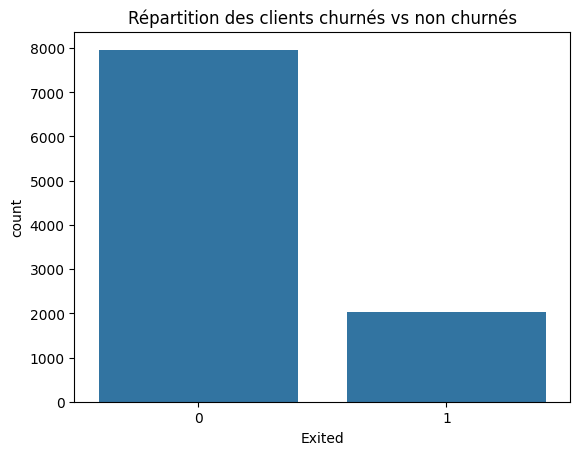

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données
df = pd.read_csv("DataTP2-Classification.csv")

# Afficher dimensions & premiers enregistrements
print("Dimensions :", df.shape)
print(df.head())

# Analyser la distribution de la variable cible
print(df['Exited'].value_counts())
sns.countplot(x='Exited', data=df)
plt.title("Répartition des clients churnés vs non churnés")
plt.show()

# Identifier types de variables
print(df.dtypes)

# Supprimer colonnes inutiles
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


Colonnes numériques : Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveM

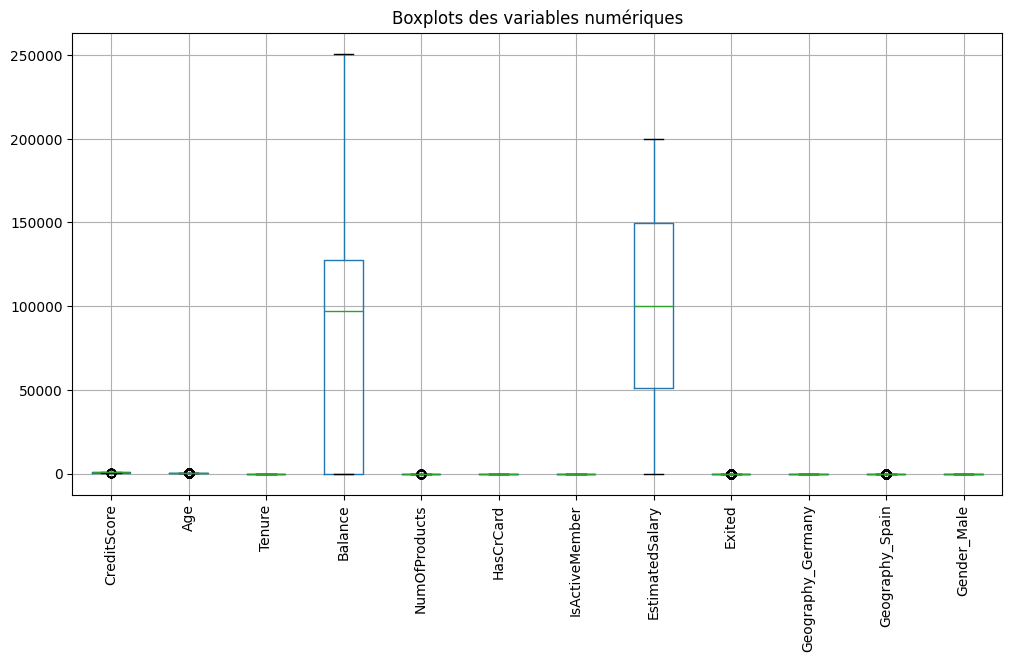

Nombre d’outliers par variable :
CreditScore            15
Age                   359
Tenure                  0
Balance                 0
NumOfProducts          60
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited               2037
Geography_Germany       0
Geography_Spain      2477
Gender_Male             0
dtype: int64


In [10]:
# Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)

# Gestion des valeurs manquantes
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=[np.number]).columns
print("Colonnes numériques :", num_cols)

# Statistiques descriptives
print(df[num_cols].describe())

# Boxplots pour outliers
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=90)
plt.title("Boxplots des variables numériques")
plt.show()

# Calcul des bornes avec IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Détection des outliers
outliers = ((df[num_cols] < borne_inf) | (df[num_cols] > borne_sup))
print("Nombre d’outliers par variable :")
print(outliers.sum())

# Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entraînement des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entraîné.")


Logistic Regression entraîné.
SVM entraîné.
KNN entraîné.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))



--- Logistic Regression ---
Accuracy : 0.811
Precision: 0.5524475524475524
Recall   : 0.2010178117048346
F1 Score : 0.2947761194029851
Matrice de confusion:
 [[1543   64]
 [ 314   79]]

--- SVM ---
Accuracy : 0.856
Precision: 0.7692307692307693
Recall   : 0.3816793893129771
F1 Score : 0.5102040816326531
Matrice de confusion:
 [[1562   45]
 [ 243  150]]

--- KNN ---
Accuracy : 0.8295
Precision: 0.6083333333333333
Recall   : 0.37150127226463103
F1 Score : 0.46129541864139023
Matrice de confusion:
 [[1513   94]
 [ 247  146]]


In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Validation croisée sur Logistic Regression
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Scores validation croisée (LogReg) :", scores)

# Grid Search pour SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleurs hyperparamètres SVM :", grid.best_params_)
print("Meilleur score GridSearch :", grid.best_score_)


Scores validation croisée (LogReg) : [0.811  0.8085 0.8085 0.818  0.8025]
Meilleurs hyperparamètres SVM : {'C': 1, 'kernel': 'rbf'}
Meilleur score GridSearch : 0.8545
